In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import collections
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from google.colab import drive
drive.mount ('/content/drive')

#!ls "/content/drive/My Drive/"
#load student data


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path='/content/drive/My Drive/IDC6940 Capstone 2026/student_data_processed.csv'
df=pd.read_csv (file_path)
#print(df.head())# used to check that data loaded correctly

#print("Data:", df.shape)#  Used to confirm size pltches that of paper's


In [ ]:
#cluster feature exclusions
# it's likely that the following were excluded:  studentID, averagedCorrectness, averagedTimespent as well as an indexing column as column1.  I just deleted the column as it is readily reproduced.
# I do want to keep the other 3 columns in the original dataset, so I delete them here
cluster_features = df.drop(columns=['studentID','averagedCorrectness','averagedTimespent'], errors='ignore')
print(f"remaining:{cluster_features.shape[1]}")


remaining:43


In [ ]:
#Normalize data
scale=MinMaxScaler()
scaled_data=scale.fit_transform(cluster_features)

In [ ]:
#Determine best K-value.  Paper figure 4 claims K=3..9 checked, 9 not included
Krange=range(3,9)
sil_score_list=[]

for k in Krange:
  K=KMeans(n_clusters=k, random_state=50, n_init=15)
  student=K.fit_predict(scaled_data)
  sil_score=silhouette_score(scaled_data, student)
  sil_score_list.append(sil_score)
  print(f"K={k}, Silhouette score = {sil_score}")

K=3, Silhouette score = 0.3658401658132336
K=4, Silhouette score = 0.31286785815882223
K=5, Silhouette score = 0.3078578769399283
K=6, Silhouette score = 0.22806063723795392
K=7, Silhouette score = 0.16838386340033065
K=8, Silhouette score = 0.16702376347525483


In [ ]:
final_K = 3
model_3 = KMeans(n_clusters=final_K, random_state=50, n_init=15)
student_3 = model_3.fit_predict(scaled_data)

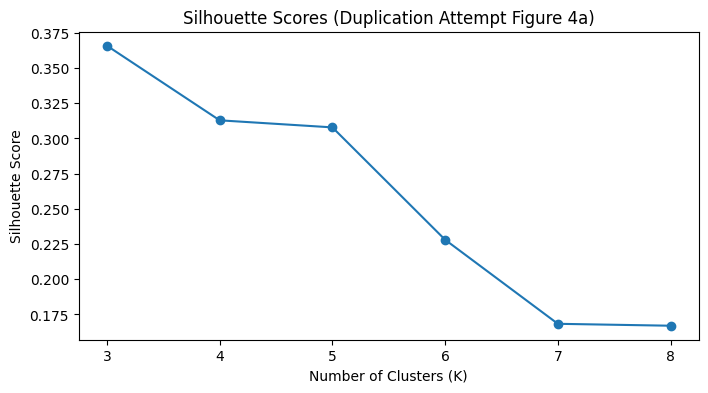

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(Krange, sil_score_list, marker='o')
plt.title('Silhouette Scores (Duplication Attempt Figure 4a)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(False)
plt.savefig('Silhouette_Scores_vs_Number_of_Clusters.svg', dpi=300, bbox_inches='tight')
plt.show()

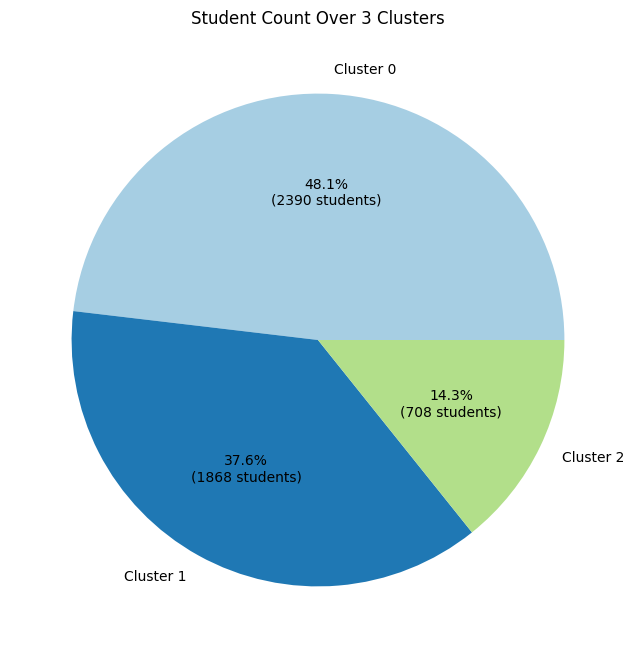

In [ ]:
#pie chart of student count
student_count = collections.Counter(student_3)
cluster_ID=sorted(student_count.keys())
students_in_cluster=[student_count[i] for i in cluster_ID]

def make_autopct(values):
    def my_autopct(pct):
        val = int(round(pct * 4966 / 100.0))
        return f'{pct:.1f}%\n({val:d} students)'
    return my_autopct


plt.figure(figsize=(8,8))
plt.pie(
    students_in_cluster,
    labels=[f'Cluster {i}' for i in cluster_ID],
    autopct=make_autopct(students_in_cluster),
    colors=plt.cm.Paired.colors
)
plt.title(f'Student Count Over 3 Clusters')
plt.savefig('Student_Count_Pie_Chart.svg', dpi=300, bbox_inches='tight')
plt.show()